<a href="https://colab.research.google.com/github/keirkwame/axionEmu/blob/main/Open_access_version_of_4e5_Planck_2018_3x2pt_analysis_(ma%3D_29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import trange
# checking that we are using a GPU
device = 'gpu:0' if tf.test.is_gpu_available() else 'cpu'
print('using', device, 'device \n')
!git clone https://github.com/keirkwame/axionEmu.git


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


using gpu:0 device 

Cloning into 'axionEmu'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 320 (delta 11), reused 9 (delta 2), pack-reused 290
Receiving objects: 100% (320/320), 161.34 MiB | 35.00 MiB/s, done.
Resolving deltas: 100% (91/91), done.
Updating files: 100% (138/138), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install git+https://github.com/justinalsing/affine.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/justinalsing/affine.git to /tmp/pip-req-build-afkq4x28
  Running command git clone --filter=blob:none --quiet https://github.com/justinalsing/affine.git /tmp/pip-req-build-afkq4x28
  Resolved https://github.com/justinalsing/affine.git to commit b24b15784d0ca615d3624b3acb4e0bace87ef48a
  Preparing metadata (setup.py) ... done
  Created wheel for affine: filename=affine-0.1-py3-none-any.whl size=3275 sha256=3d8e75b0cd68ca03321f87a424a8c7608adbb668969d4bbd2f3a446dfb7dad25
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2d9oc6q/wheels/d6/0c/b3/890e11d65e451d68c4b3be92f11d15ea306f104f362fb6efe2
Successfully built affine


In [4]:
import affine

In [5]:
from axionEmu.cosmopower.cosmopower_NN import cosmopower_NN

In [6]:
from axionEmu.cosmopower.cosmopower_PCAplusNN import cosmopower_PCAplusNN

In [ ]:
##DM-like axions (m > 5.e-27 eV)

tt_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/content/drive/MyDrive/5e5_emulator_models/TT_cp_NN_5e5_DM_t2'
                               )

te_emu_model_ax = cosmopower_PCAplusNN(restore=True,
                                restore_filename='/content/drive/MyDrive/5e5_emulator_models/TE_cp_PCAplusNN_5e5_DM_t2'
                               )

ee_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/content/drive/MyDrive/5e5_emulator_models/EE_cp_NN_5e5_DM_t2'
                                )

In [7]:
##DE-like axions (m < 5.e-27 eV)

tt_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/content/drive/MyDrive/5e5_emulator_models/TT_cp_NN_5e5_DE_t2'
                               )

te_emu_model_ax = cosmopower_PCAplusNN(restore=True,
                                restore_filename='/content/drive/MyDrive/5e5_emulator_models/TE_cp_PCAplusNN_5e5_DE_t2'
                               )

ee_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/content/drive/MyDrive/5e5_emulator_models/EE_cp_NN_5e5_DE_t2'
                                )

In [8]:
cosmo_params = dict()
cosmo_params['h'] = np.array([0.7])
cosmo_params['tau_reio'] = np.array([0.055])
cosmo_params['omega_b'] = np.array([0.0224])
cosmo_params['omega_cdm'] = np.array([0.12])
cosmo_params['n_s'] = np.array([0.96])
cosmo_params['omega_ax'] =np.array([0.001])
cosmo_params['log10ma'] = np.array([4],dtype='float64')
cosmo_params['ln10A_s'] = np.array([3.48])

In [9]:
len([list(cosmo_params.keys())])

1

In [10]:
b = te_emu_model_ax.predictions_np(cosmo_params)

In [11]:
b[0].shape

(5999,)

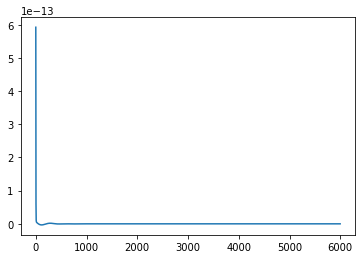

In [12]:
#Testing power spectrum prediction
plt.plot(b[0])

In [ ]:
##m = 1e-25 axion
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/content/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_cdm':    [0.0003, 0.149, 'uniform'],
                         'h':            [0.64, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          'omega_ax': [1e-32, 0.09,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'],
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
fixed = {'log10ma': 7.0}
# instantiation
tf_planck_ax = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
                                  fix_parameters = fixed,
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax,
                                  tt_emu_model=tt_emu_model_ax,
                                  te_emu_model=te_emu_model_ax)
# tf_planck_2e4 = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
#                                   fix_parameters = dict(),
#                                   tf_planck2018_lite_path=tf_planck2018_lite_path,
#                                   ee_emu_model=ee_emu_model_2e4,
#                                   tt_emu_model=tt_emu_model_2e4,
#                                   te_emu_model=te_emu_model_2e4)

In [ ]:
##m = 1e-25 axion
FIDUCIAL = np.reshape(np.array([ 0.022242,  0.1197,  0.673,  0.055,  0.9658,  3.0753,  0.05, 1.0080]).astype('float32'), (1, 8))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,  1E-2, 1E-4]).astype('float32'), (1,8))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [13]:
##m = 1e-28 axion
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/content/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_lamda':    [0.16, 0.36, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          #'log10ma': [2.9, 3.1, 'uniform'], #10^32ma(ma in unit of eV)
                          'omega_ax': [1e-32, 0.01,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'],
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
fixed = {'log10ma': 4.0}
# instantiation
tf_planck_ax = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
                                  fix_parameters = fixed,
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax,
                                  tt_emu_model=tt_emu_model_ax,
                                  te_emu_model=te_emu_model_ax)
# tf_planck_2e4 = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
#                                   fix_parameters = dict(),
#                                   tf_planck2018_lite_path=tf_planck2018_lite_path,
#                                   ee_emu_model=ee_emu_model_2e4,
#                                   tt_emu_model=tt_emu_model_2e4,
#                                   te_emu_model=te_emu_model_2e4)

In [22]:
##m = 1e-28 axion
FIDUCIAL = np.reshape(np.array([ 0.022242,  0.3107,  0.673,  0.1,  0.9658,  3.0753,  0.005, 1.0080]).astype('float32'), (1, 8))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-3,     1E-2,   1E-3,   1E-3,    1E-3,  1E-3, 1E-4]).astype('float32'), (1,8))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [ ]:
##m = 1e-30 axion
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/content/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_lamda':    [0.16, 0.36, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          #'log10ma': [2.9, 3.1, 'uniform'], #10^32ma(ma in unit of eV)
                          'omega_ax': [1e-32, 0.01,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'],
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
fixed = {'log10ma': 2.0}
# instantiation
tf_planck_ax = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
                                  fix_parameters = fixed,
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax,
                                  tt_emu_model=tt_emu_model_ax,
                                  te_emu_model=te_emu_model_ax)
# tf_planck_2e4 = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
#                                   fix_parameters = dict(),
#                                   tf_planck2018_lite_path=tf_planck2018_lite_path,
#                                   ee_emu_model=ee_emu_model_2e4,
#                                   tt_emu_model=tt_emu_model_2e4,
#                                   te_emu_model=te_emu_model_2e4)

In [ ]:
##m = 1e-30 axion
FIDUCIAL = np.reshape(np.array([ 0.022242,  0.3107,  0.673,  0.1,  0.9658,  3.0753,  0.005, 1.0080]).astype('float32'), (1, 8))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-3,     1E-2,   1E-3,   1E-3,    1E-3,  1E-3, 1E-4]).astype('float32'), (1,8))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [14]:
##LCDM
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/content/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_cdm':    [0.0003, 0.149, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          #'log10ma': [2.9, 3.1, 'uniform'], #10^32ma(ma in unit of eV)
                          #'omega_ax': [1e-32, 0.01,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'],
                         }
fixed = {'log10ma': 2.0, 'omega_ax': 9.794086321726434e-10}
#fixed = {'log10ma': 2.0}
# instantiation
tf_planck_ax = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
                                  fix_parameters = fixed,
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax,
                                  tt_emu_model=tt_emu_model_ax,
                                  te_emu_model=te_emu_model_ax)
# tf_planck_2e4 = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
#                                   fix_parameters = dict(),
#                                   tf_planck2018_lite_path=tf_planck2018_lite_path,
#                                   ee_emu_model=ee_emu_model_2e4,
#                                   tt_emu_model=tt_emu_model_2e4,
#                                   te_emu_model=te_emu_model_2e4)

In [15]:
##LCDM
FIDUCIAL = np.reshape(np.array([ 0.022242,  0.1197,  0.673,  0.1,  0.9658,  3.0753,  1.0080]).astype('float32'), (1, 7))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,  1E-4]).astype('float32'), (1,7))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [46]:
##All axion masses
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/content/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_lamda':    [0.16, 0.36, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          'log10ma': [3.999, 4.001, 'uniform'], #10^32ma(ma in unit of eV)
                          'omega_ax': [1e-32, 0.01,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'],
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
#fixed = {'log10ma': 4.0}
fixed={}
# instantiation
tf_planck_ax = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
                                  fix_parameters = fixed,
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax,
                                  tt_emu_model=tt_emu_model_ax,
                                  te_emu_model=te_emu_model_ax)
# tf_planck_2e4 = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
#                                   fix_parameters = dict(),
#                                   tf_planck2018_lite_path=tf_planck2018_lite_path,
#                                   ee_emu_model=ee_emu_model_2e4,
#                                   tt_emu_model=tt_emu_model_2e4,
#                                   te_emu_model=te_emu_model_2e4)

In [47]:
##All axion masses
FIDUCIAL = np.reshape(np.array([ 0.022242,  0.3107,  0.673,  0.1,  0.9658,  3.0753, 4., 0.005, 1.0080]).astype('float32'), (1, 9))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-3,     1E-2,   1E-3,   1E-3,    1E-3, 1E-10,  1E-3, 1E-4]).astype('float32'), (1,9))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [48]:
@tf.function
def log_prob_ax(theta):
    return tf.squeeze(tf_planck_ax.posterior(theta), -1)

In [49]:
# number of parameters
n_params_ax = len(parameters_and_priors_ax)

# number of walkers (note you'll end up with a total of 2*n_walkers for this parallel variant of the affine sampler)
n_walkers = 250

# initialize walkers and current state
walkers1_ax = tf.random.normal([n_walkers, n_params_ax], FIDUCIAL, EPSILON)
walkers2_ax = tf.random.normal([n_walkers, n_params_ax], FIDUCIAL, EPSILON)
current_state_ax = [walkers1_ax, walkers2_ax]

In [18]:
!pip install -U emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 5.3 MB/s eta 0:00:00


In [50]:
# number of MCMC steps to take (you'll end up with an MCMC chain with shape (n_steps, 2*n_walkers, n_parameters))
n_steps = 10000

# run the sampler
with tf.device(device):
    chain_ax = affine.affine_sample(log_prob_ax, n_steps, current_state_ax, args=[])

100%|██████████| 9999/9999 [03:05<00:00, 53.97it/s]


In [51]:
burnin_steps = 200
samples_ax = chain_ax.numpy()[burnin_steps:,:,:].reshape((-1, n_params_ax))
#samples_2e4 = chain_2e4.numpy()[burnin_steps:,:,:].reshape((-1, n_params_ax))

In [52]:
samples_ax.shape

(4900000, 9)

In [21]:
np.linspace(100, 15500, 155)

array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,  1600.,
        1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,  2400.,
        2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,  3200.,
        3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,  4000.,
        4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,  4800.,
        4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,  5600.,
        5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,  6400.,
        6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,  7200.,
        7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,  8000.,
        8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,  8800.,
        8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,  9600.,
        9700.,  9800.,  9900., 10000., 10100., 10200., 10300., 10400.,
       10500., 10600., 10700., 10800., 10900., 11000., 11100., 11200.,
      

In [22]:
import emcee
auto = []
for i in np.linspace(100, 15500, 155):
  auto_time = np.mean(emcee.autocorr.integrated_time(chain_ax.numpy()[:int(i)], tol=0))
  auto.append(auto_time)

Text(0, 0.5, 'mean $\\hat{\\tau}$')

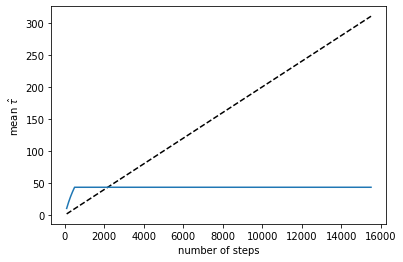

In [23]:
import matplotlib.pyplot as plt
n = np.linspace(100, 15500, 155)
y = auto
plt.plot(n, n / 50.0, "--k")
plt.plot(n, y)
# plt.xlim(0, n.max())
# plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$")

In [15]:
!pip install getdist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.3/777.3 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for getdist: filename=GetDist-1.4.1-py3-none-any.whl size=226638 sha256=d4327c9691414d8a636f521737221a4298eece045f29d944ce352c0bbcafaee4
  Stored in directory: /root/.cache/pip/wheels/68/f4/3e/d52c13125542007fe870b8ff986db393d70da9061ce6a8de74
Successfully built getdist


In [ ]:
##m = 1e-25 axion
import pickle
# f = open("/content/drive/MyDrive/2e5_emulator_models/test_2e5_0_likelihood_ax_7.pkl",'rb')
f = open("/content/drive/MyDrive/5e5_emulator_models/test_5e5_lamda_likelihood_ax_7.pkl",'rb')
samples_unflat2 = pickle.load(f)
samples_test2 = pickle.load(f)
diff2 = pickle.load(f)
# sampler1 = pickle.load(f)
f.close()

In [25]:
##m = 1e-28 axion
import pickle
# f = open("/content/drive/MyDrive/2e5_emulator_models/test_2e5_0_likelihood_ax_7.pkl",'rb')
f = open("/content/drive/MyDrive/5e5_emulator_models/test_5e5_lamda_likelihood_ax_4.pkl",'rb')
samples_unflat2 = pickle.load(f)
samples_test2 = pickle.load(f)
diff2 = pickle.load(f)
# sampler1 = pickle.load(f)
f.close()

In [ ]:
##m = 1e-30 axion
import pickle
# f = open("/content/drive/MyDrive/2e5_emulator_models/test_2e5_0_likelihood_ax_7.pkl",'rb')
f = open("/content/drive/MyDrive/5e5_emulator_models/test_5e5_lamda_likelihood_ax_2.pkl",'rb')
samples_unflat2 = pickle.load(f)
samples_test2 = pickle.load(f)
diff2 = pickle.load(f)
# sampler1 = pickle.load(f)
f.close()

In [26]:
samples_test = samples_unflat2[200:, :, :].reshape((-1, n_params_ax))

In [27]:
samples_test.shape

(150000, 8)

In [28]:
diff2

162173.82336902618

In [53]:
#Testing samples from axionEmu
print(np.max(samples_ax[:10000, 0]))

1.6324223e+36


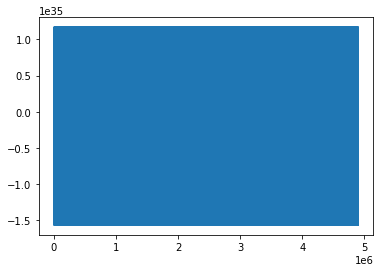

In [54]:
plt.plot(samples_ax[:, -1])

In [31]:
##m = 1e-28 axion
# axionCAMB + EMCEE
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{lamda}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         #r"log 10^{32} ma",
         r"\omega_{\mathrm{ax}}",
         r"A_{planck}"]
labels = names
mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in
Removed no burn in


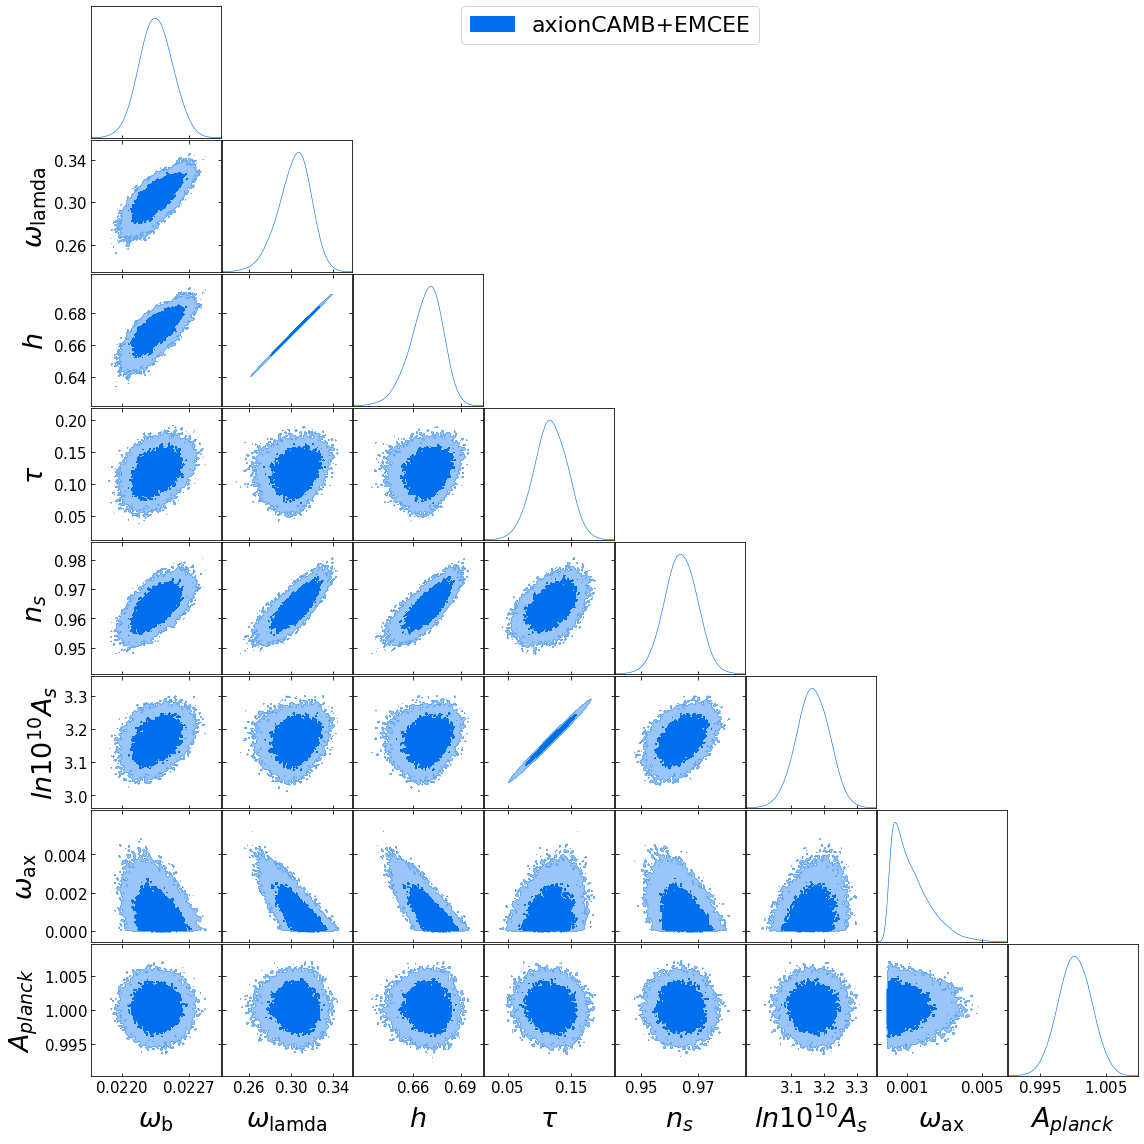

In [ ]:
##m = 1e-28 axion
#g.triangle_plot([mcsamples, mcsamples_ax], filled=True, legend_labels=['axionCAMB+EMCEE','4e5 emulator+GPU sampler (ma=1e-28)'])
g.triangle_plot([mcsamples], filled=True, legend_labels=['axionCAMB+EMCEE'])

In [ ]:
##m = 1e-28 axion
g.export('ma=1e-28_lamda.png')

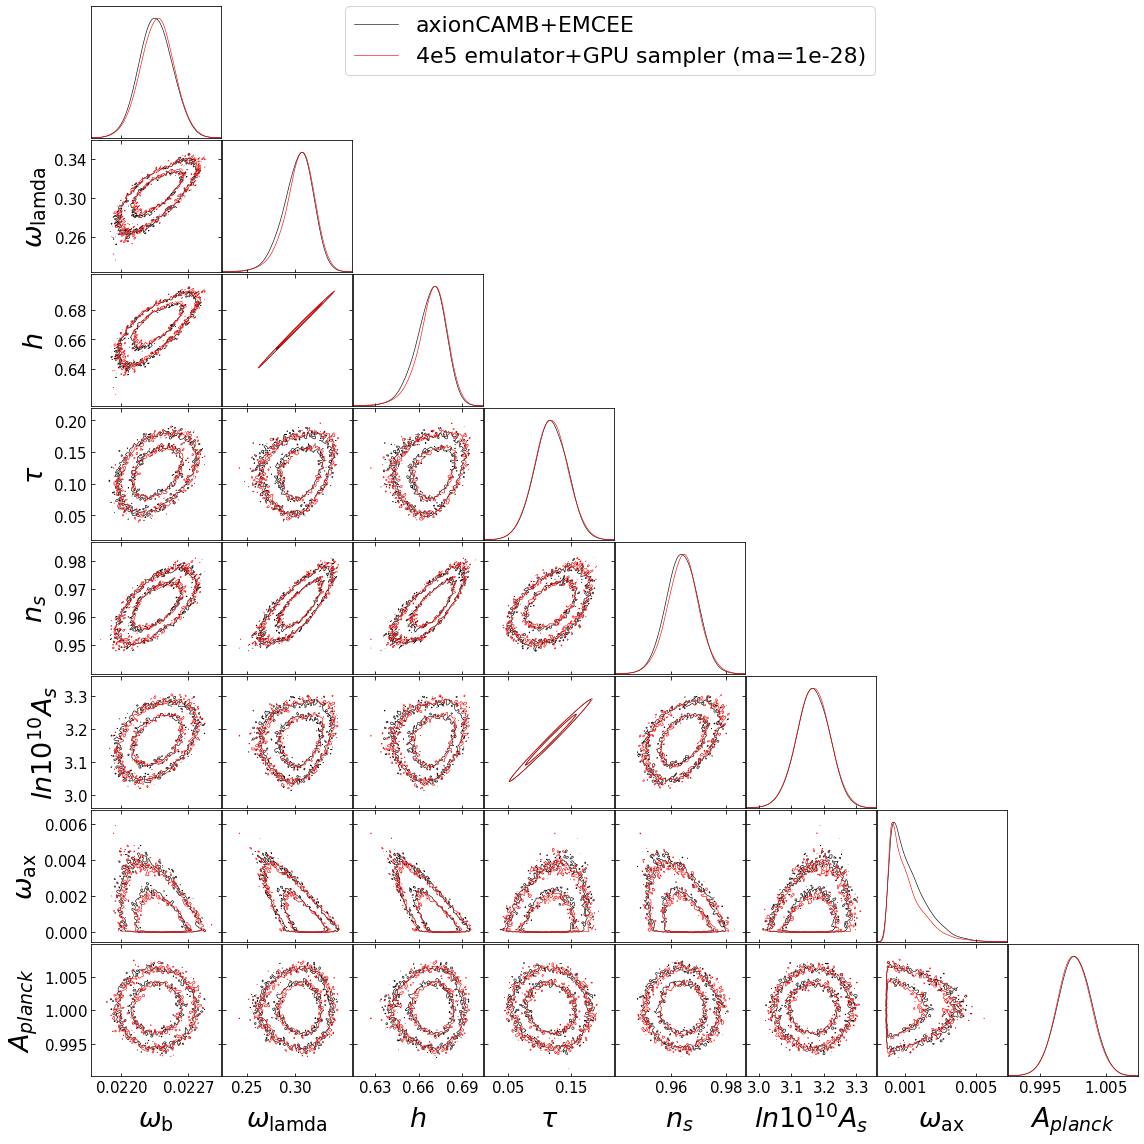

In [32]:
##m = 1e-28 axion
g.triangle_plot([mcsamples, mcsamples_ax], filled=False, legend_labels=['axionCAMB+EMCEE','4e5 emulator+GPU sampler (ma=1e-28)'])

In [ ]:
##m = 1e-25 axion
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{cdm}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         #r"log 10^{32} ma",
         r"\omega_{\mathrm{ax}}",
         r"A_{planck}"]
labels = names
# mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in


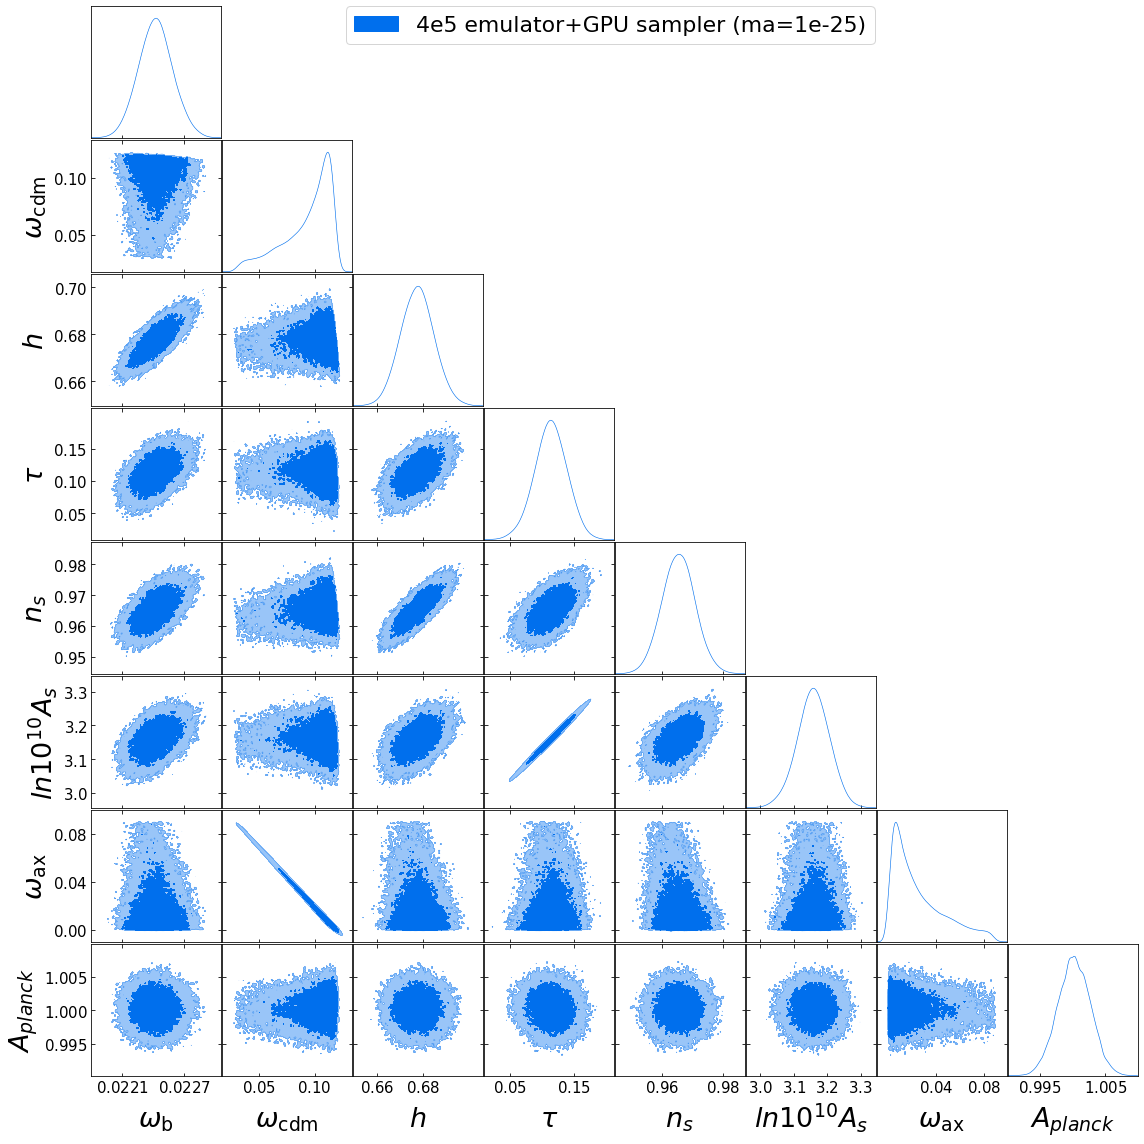

In [ ]:
##m = 1e-25 axion
g.triangle_plot([mcsamples_ax], filled=True, legend_labels=['4e5 emulator+GPU sampler (ma=1e-25)'])

In [ ]:
##m = 1e-25 axion
# axionCAMB + EMCEE
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{cdm}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         #r"log 10^{32} ma",
         r"\omega_{\mathrm{ax}}",
         r"A_{planck}"]
labels = names
mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in
Removed no burn in


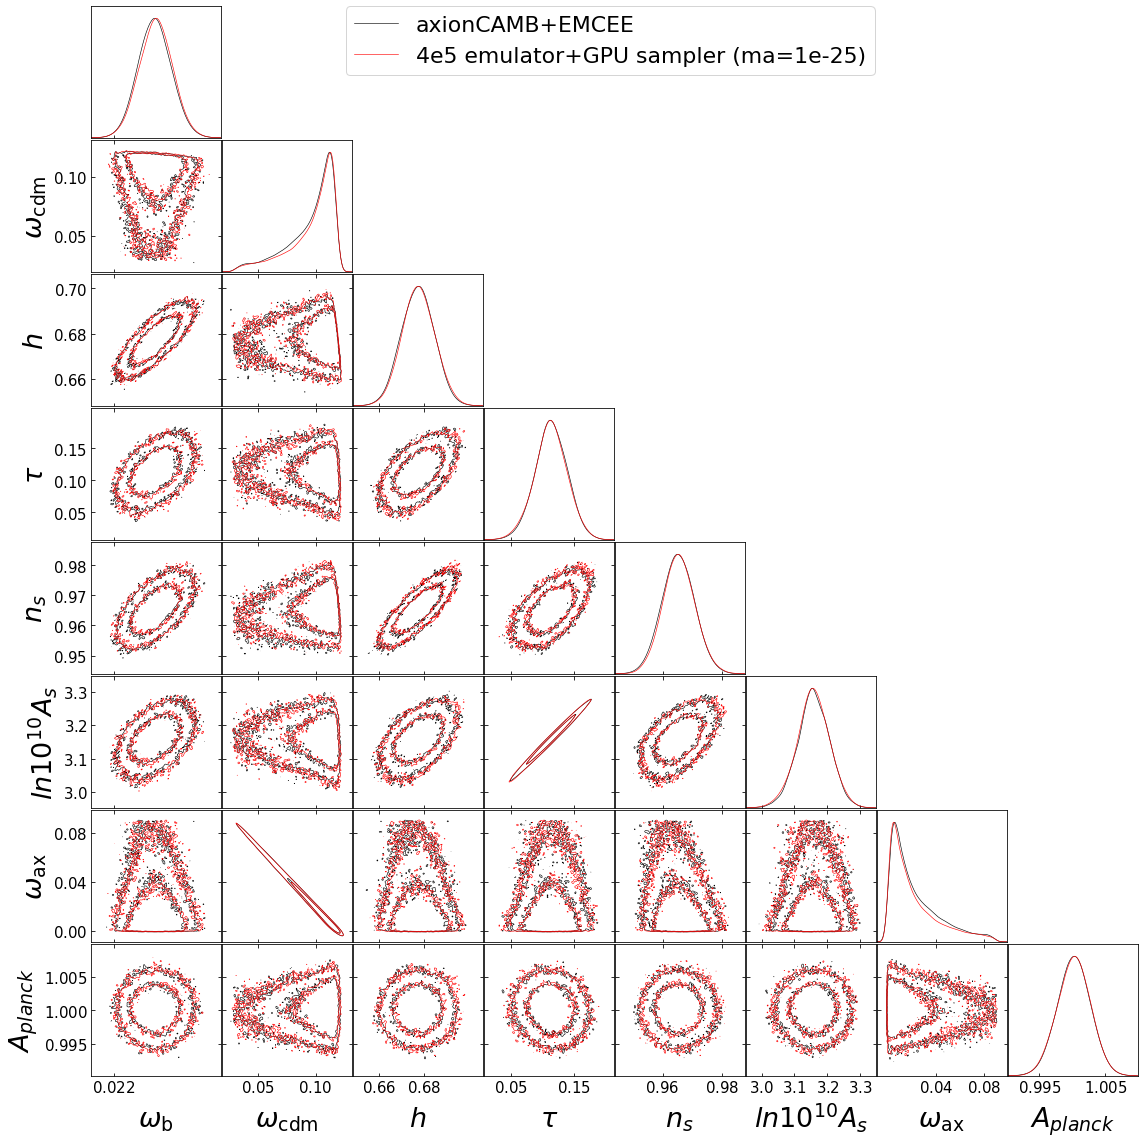

In [ ]:
##m = 1e-25 axion
g.triangle_plot([mcsamples, mcsamples_ax], filled=False, legend_labels=['axionCAMB+EMCEE','4e5 emulator+GPU sampler (ma=1e-25)'])

In [ ]:
##m = 1e-25 axion
g.export('new.png')

In [22]:
##LCDM
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{cdm}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         #r"log 10^{32} ma",
         #r"\omega_{\mathrm{ax}}",
         r"A_{planck}"]
labels = names
# mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in


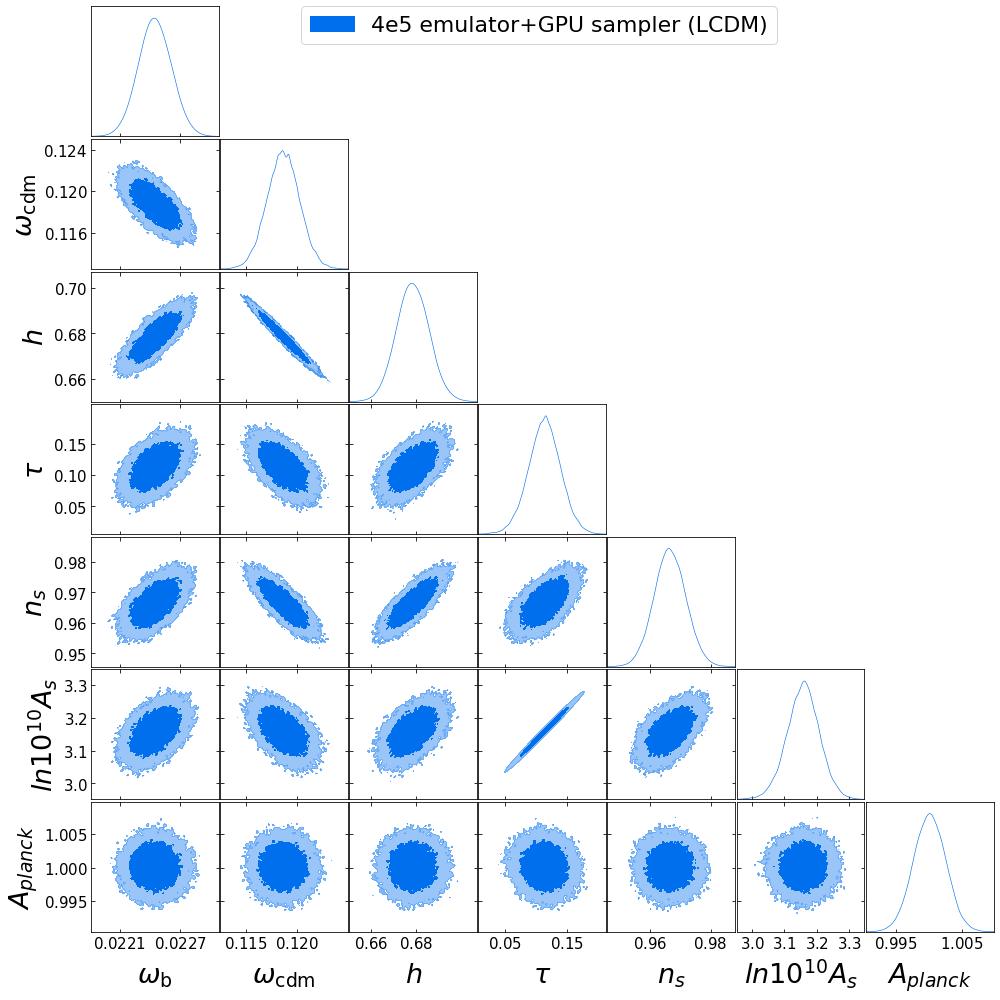

In [23]:
##LCDM
g.triangle_plot([mcsamples_ax], filled=True, legend_labels=['4e5 emulator+GPU sampler (LCDM)'])

In [16]:
##All axion masses
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{cdm}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         r"log 10^{32} ma",
         r"\omega_{\mathrm{ax}}",
         r"A_{planck}"]
labels = names
# mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in


/usr/local/lib/python3.8/dist-packages/getdist/chains.py:406: RuntimeWarning: overflow encountered in square
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm


/usr/local/lib/python3.8/dist-packages/getdist/chains.py:680: RuntimeWarning: overflow encountered in square
  return np.dot(self.mean_diff(paramVec) ** 2, self.weights) / self.get_norm()
/usr/local/lib/python3.8/dist-packages/getdist/chains.py:512: RuntimeWarning: overflow encountered in square
  diff2 = (d[:-k] - d[k:]) ** 2 / kernel_std ** 2
/usr/local/lib/python3.8/dist-packages/getdist/chains.py:530: RuntimeWarning: overflow encountered in square
  return np.dot(np.exp(-(d[:-_k] - d[_k:]) ** 2 / (4 * kernel_std ** 2)) * self.weights[:-_k],
/usr/local/lib/python3.8/dist-packages/getdist/chains.py:680: RuntimeWarning: overflow encountered in square
  return np.dot(self.mean_diff(paramVec) ** 2, self.weights) / self.get_norm()
/usr/local/lib/python3.8/dist-packages/getdist/chains.py:512: RuntimeWarning: overflow encountered in square
  diff2 = (d[:-k] - d[k:]) ** 2 / kernel_std ** 2
/usr/local/lib/python3.8/dist-packages/getdist/chains.py:530: RuntimeWarning: overflow encountered in 

ValueError: ignored

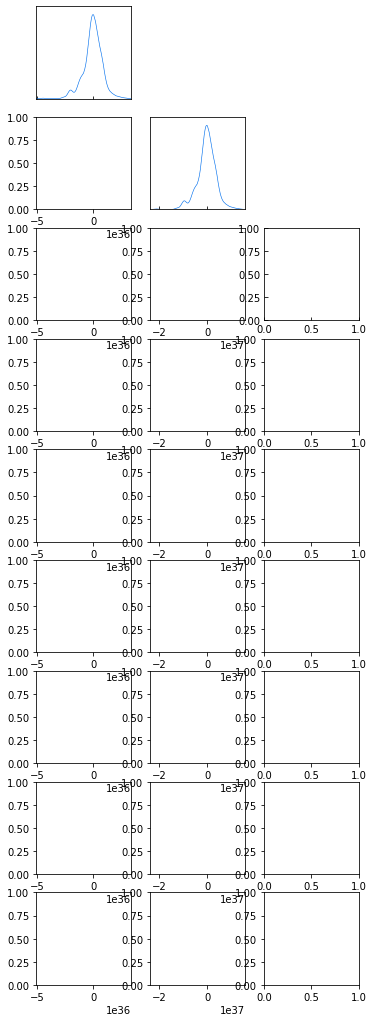

In [17]:
##All axion masses
g.triangle_plot([mcsamples_ax], filled=True, legend_labels=['4e5 emulator+GPU sampler (Vary axion mass)'])

In [ ]:
##m = 1e-30 axion
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{Lambda}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         #r"log 10^{32} ma",
         r"\omega_{\mathrm{ax}}",
         r"A_{planck}"]
labels = names
mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in
Removed no burn in


/usr/local/lib/python3.8/dist-packages/getdist/chains.py:406: RuntimeWarning: overflow encountered in square
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm


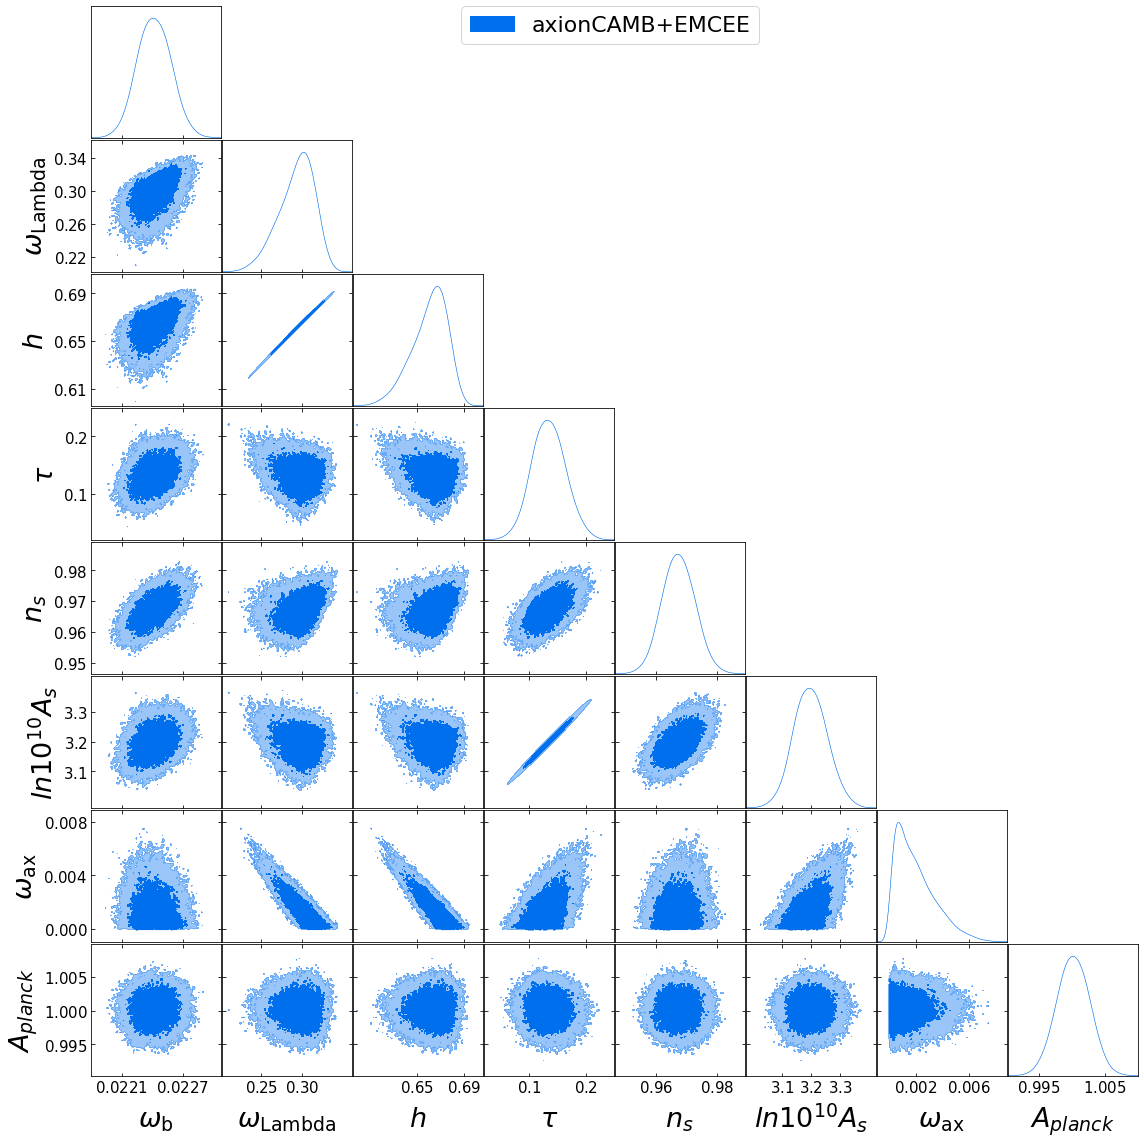

In [ ]:
##m = 1e-30 axion
#g.triangle_plot([mcsamples, mcsamples_ax], filled=True, legend_labels=['axionCAMB+EMCEE','4e5 emulator+GPU sampler (ma=1e-28)'])
g.triangle_plot([mcsamples], filled=True, legend_labels=['axionCAMB+EMCEE'])

/usr/local/lib/python3.8/dist-packages/getdist/chains.py:680: RuntimeWarning: overflow encountered in square
  return np.dot(self.mean_diff(paramVec) ** 2, self.weights) / self.get_norm()
/usr/local/lib/python3.8/dist-packages/getdist/chains.py:512: RuntimeWarning: overflow encountered in square
  diff2 = (d[:-k] - d[k:]) ** 2 / kernel_std ** 2
/usr/local/lib/python3.8/dist-packages/getdist/chains.py:530: RuntimeWarning: overflow encountered in square
  return np.dot(np.exp(-(d[:-_k] - d[_k:]) ** 2 / (4 * kernel_std ** 2)) * self.weights[:-_k],


ValueError: ignored

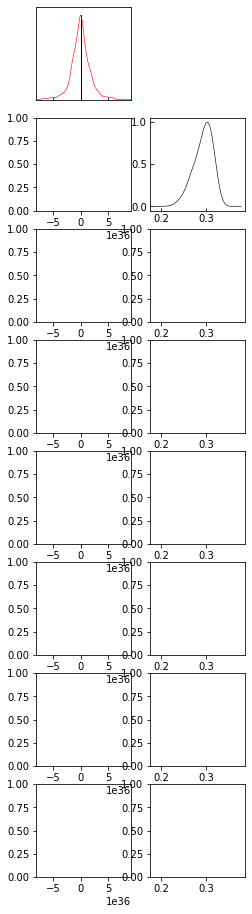

In [ ]:
##m = 1e-30 axion
g.triangle_plot([mcsamples, mcsamples_ax], filled=False, legend_labels=['axionCAMB+EMCEE','4e5 emulator+GPU sampler (ma=1e-30)'])